In [1]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2 
import torch
import tqdm
import os

# rheology2023 สำหรับ Gen frame 10 รอบ

###  ``/media/SSD/rheology2023/Saliva2/``

In [2]:
import glob

name = ['AS00_P100_D0_20XINF_UWELL_20230123_085951' , 'AS00_P100_D0_20XINF_UWELL_20230123_090132', 'AS00_P100_D0_20XINF_UWELL_20230123_090309']
path_root = '/media/SSD/rheology2023/Saliva2/'
files_ = []
for n in name:
    files  = path_root+n
    files_.append(files)
print(len(files_))
files_

3


['/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_085951',
 '/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132',
 '/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090309']

## Create Text file For Predict Frame Using FLAVR and FILM Model 

In [3]:
import glob

for k in range(len(files_)) :
    #f_name_toSave = pth[:1]
    pth = f'{files_[k]}-2linedemo.txt'
    #print(pth)
    pth2save_txt = pth.replace("rheology2023/Saliva2", "Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin")
    print(pth2save_txt)
    mkdir_name = pth2save_txt.split('/')[:-1]
#     mkdir_name2 = pth2save_txt.split('/')[:6]
#     mkdir_name2_ = '/'.join(mkdir_name2)
    mkdir_name_ = '/'.join(mkdir_name)
    print(mkdir_name_)
    print(f'='*125)

/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_085951-2linedemo.txt
/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin
/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_090132-2linedemo.txt
/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin
/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_090309-2linedemo.txt
/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin


In [8]:
import glob

for k in range(len(files_)) :
    #f_name_toSave = pth[:1]
    pth = f'{files_[k]}-2linedemo.txt'
    #print(pth)
    pth2save_txt = pth.replace("rheology2023/Saliva2", "Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin")
    #print(pth2save_txt)
    mkdir_name = pth2save_txt.split('/')[:-1]
#     mkdir_name2 = pth2save_txt.split('/')[:6]
#     mkdir_name2_ = '/'.join(mkdir_name2)
    mkdir_name_ = '/'.join(mkdir_name)
    if not os.path.exists(mkdir_name_) :
        os.makedirs(mkdir_name_)

    files = glob.glob(f"{files_[k]}/*")
    files.sort()
    #print(files)
    df = pd.DataFrame(files, columns =['Path'])
    df_ = df[:-1]
    df_ = df_.reset_index(drop=True)
    df2 = pd.DataFrame(files, columns =['Path'])
    df2_ = df2[1:]
    df2_ = df2_.reset_index(drop=True)
    df_['Path_txt'] = ''
    for i in range(len(df_)):
        name1 = df_['Path'][i]
        name2 = df2_['Path'][i]
        df_.loc[df_.index[i], 'Path_txt'] = str(name1)+' '+str(name2) 
    #print(df_.shape)
    list_path = df_['Path_txt'].tolist()
    with open(f'{pth2save_txt}', 'w') as f:
             for line in list_path:
                 f.write(f"{line}\n")
    print(f'On Process : Write text file name -> [ {pth2save_txt} ] ')   
    print('='*125)

On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_085951-2linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_090132-2linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_090309-2linedemo.txt ] 


## Chek Text Files

In [14]:
pth2save_txt = '/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin'
pth2save_txt

'/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin'

In [17]:
import glob

test_demo_ = glob.glob(f"{pth2save_txt}/*-2linedemo.txt")
print(len(test_demo_))
test_demo_

3


['/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_090309-2linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_085951-2linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/_10GenFrame/ues2Frame/pred_text/Saliva2/origin/AS00_P100_D0_20XINF_UWELL_20230123_090132-2linedemo.txt']

In [18]:
sequence_list_ = []
for i in range(len(test_demo_)):
    #print(test_demo_[i])
    with open(test_demo_[i], 'r') as txt:
        sequence_list = [line.strip() for line in txt]
    #print(len(sequence_list))
    sequence_list_.append(len(sequence_list))
print(len(sequence_list_))
print(f'All Dataset : {sum(sequence_list_)}')
sequence_list_

3
All Dataset : 12000


[4000, 4000, 4000]

In [22]:
f = open(test_demo_[0], "r")
print(f.readline())

/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090309/AS00_P100_D0_20XINF_UWELL_20230123_090309_0000000001.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090309/AS00_P100_D0_20XINF_UWELL_20230123_090309_0000000002.jpg



In [19]:
f = open(test_demo_[1], "r")
print(f.readline())

/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_085951/AS00_P100_D0_20XINF_UWELL_20230123_085951_0000000001.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_085951/AS00_P100_D0_20XINF_UWELL_20230123_085951_0000000002.jpg



In [20]:
f = open(test_demo_[2], "r")
print(f.readline())

/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000001.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000002.jpg



In [23]:
sequence_list

['/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000001.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000002.jpg',
 '/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000002.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000003.jpg',
 '/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000003.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000004.jpg',
 '/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090132/AS00_P100_D0_20XINF_UWELL_20230123_090132_0000000004.jpg /media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_09

## 🐥 Check Image

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090309/AS00_P100_D0_20XINF_UWELL_20230123_090309_0000000001.jpg
Images Name : **AS00_P100_D0_20XINF_UWELL_20230123_090309_0000000001.jpg, --> Shape  (800, 800, 3)
image size: 87,309 bytes


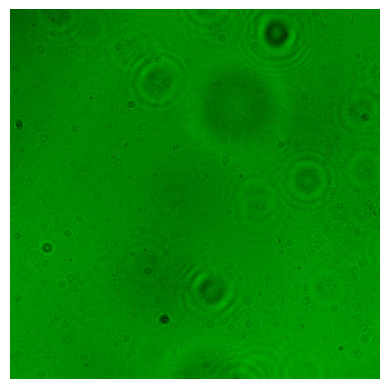

/media/SSD/rheology2023/Saliva2/AS00_P100_D0_20XINF_UWELL_20230123_090309/AS00_P100_D0_20XINF_UWELL_20230123_090309_0000000002.jpg
Images Name : **AS00_P100_D0_20XINF_UWELL_20230123_090309_0000000002.jpg, --> Shape  (800, 800, 3)
image size: 87,289 bytes


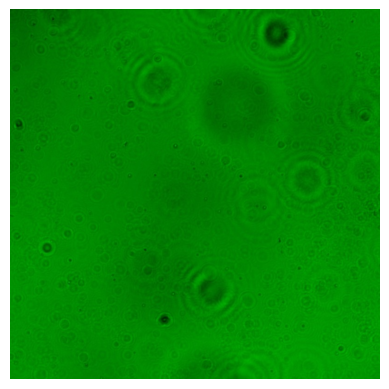

In [27]:
root_pth = list_path[0]
#root_pth
img1_path, img2_path = root_pth.split(' ')
ims = [img1_path, img2_path]
#ims
for im in ims:
    print(im)
    name_im = im.split('/')[-1]
    #print(name_im)
    image = cv2.imread(im)
    sZ = os.path.getsize(im)
    print(f"Images Name : **{name_im}, --> Shape ", image.shape)
    print(f"image size: {sZ:,} bytes")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()